In [1]:
###importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##changing the working dierc 
import os
os.chdir('P:\SAMPLE DATA')

In [3]:
##importing the data to the python environment
df=pd.read_excel('updated fuel data.xlsx')

In [4]:
data=df.copy()

In [5]:
df.head()

,InvDate,InvNet,InvQty
0,2019-01-29,452.00,1000.0
1,2019-02-04,453.53,700.0
2,2019-08-28,9523.83,16788.0
3,2019-11-15,228.26,501.0
4,2019-12-02,235.00,500.0


In [6]:
df.shape

(683495, 3)

In [7]:
##generally missing values are to be removed in the timeseries analysis and we do have only small amount of missing values 
##and it generated because we group the invoice quantity by months
df.tail(10)

,InvDate,InvNet,InvQty
683485,2020-06-05,158.76,700.0
683486,2020-06-04,94.83,410.0
683487,2020-06-01,87.06,381.0
683488,2020-06-05,151.38,674.0
683489,2020-06-12,245.50,1000.0
683490,2020-06-05,130.68,600.0
683491,2020-06-10,182.03,787.0
683492,2020-06-01,181.68,800.0
683493,2020-06-24,137.55,500.0
683494,2020-06-24,137.83,501.0


In [8]:
df.isnull().sum()

InvDate    0
InvNet     0
InvQty     0
dtype: int64

In [9]:
##removing the negative values from the dataset
#df = df[df['InvNet'] > 0]

In [10]:
df.shape

(683495, 3)

In [11]:
# Changed InvQty from float64 to int
df['InvQty'] =df['InvQty'].astype('int')

In [12]:
df['InvDate']=pd.to_datetime(df['InvDate'], errors='coerce')

In [13]:
data=(df.groupby([pd.Grouper(key='InvDate', freq='MS')])['InvQty'].sum().reset_index())

In [14]:
data.head(10)

,InvDate,InvQty
0,2015-07-01,-1
1,2015-08-01,0
2,2015-09-01,0
3,2015-10-01,0
4,2015-11-01,0
5,2015-12-01,0
6,2016-01-01,0
7,2016-02-01,0
8,2016-03-01,0
9,2016-04-01,0


In [15]:
data.tail(10)

,InvDate,InvQty
74,2021-09-01,14386470
75,2021-10-01,10552834
76,2021-11-01,9331559
77,2021-12-01,6444634
78,2022-01-01,6508339
79,2022-02-01,7714536
80,2022-03-01,9978688
81,2022-04-01,7717145
82,2022-05-01,6726576
83,2022-06-01,2757706


In [16]:
data=data.loc[(data['InvDate']>= '2019-01-01') & (data['InvDate']< '2022-06-01')]

In [17]:
data.tail()

,InvDate,InvQty
78,2022-01-01,6508339
79,2022-02-01,7714536
80,2022-03-01,9978688
81,2022-04-01,7717145
82,2022-05-01,6726576


In [18]:
data.shape

(41, 2)

In [19]:
data.dtypes

InvDate    datetime64[ns]
InvQty              int32
dtype: object

In [20]:
data.to_csv('fuel month.csv')

In [21]:
data['InvDate']=pd.to_datetime(data['InvDate'], infer_datetime_format=True)
indexedDataset = data.set_index(['InvDate'])

In [22]:
from datetime import datetime
indexedDataset.head(5)

,InvQty
InvDate,
2019-01-01,7883079
2019-02-01,7996162
2019-03-01,8019657
2019-04-01,8562696
2019-05-01,7079853


In [23]:
indexedDataset.to_excel('trend.xlsx')

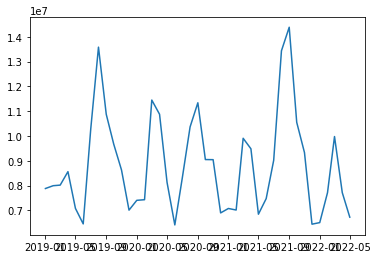

In [24]:
plt.plot(indexedDataset)

In [25]:
###dickey fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest=adfuller(indexedDataset['InvQty'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test statistic','p-value','#Lags used','Nuber of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]= value

print(dfoutput)

Results of Dickey-Fuller Test:
Test statistic                -4.826274
p-value                        0.000048
#Lags used                     8.000000
Nuber of observations used    32.000000
Critical value(1%)            -3.653520
Critical value(5%)            -2.957219
Critical value(10%)           -2.617588
dtype: float64


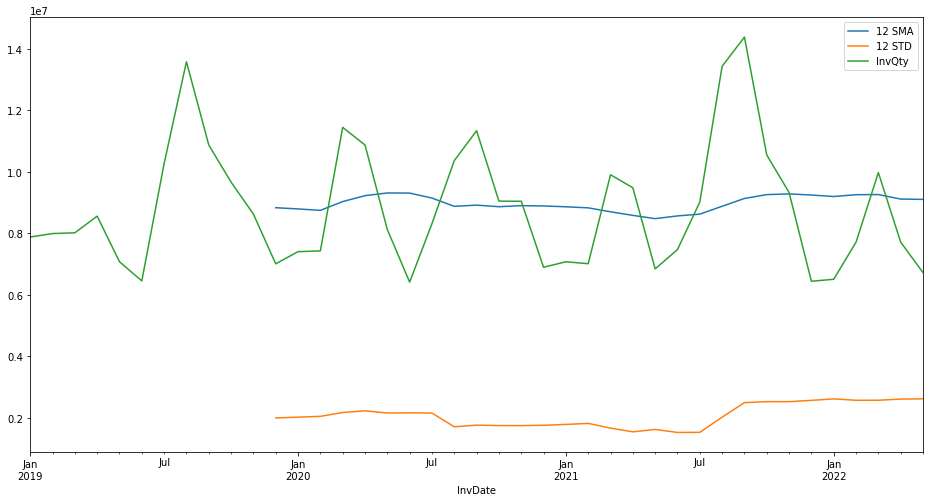

In [26]:
indexedDataset['InvQty'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
indexedDataset['InvQty'].rolling(12).std().plot(label='12 STD')
indexedDataset['InvQty'].plot()
plt.legend()

In [27]:
 from statsmodels.tsa.seasonal import seasonal_decompose

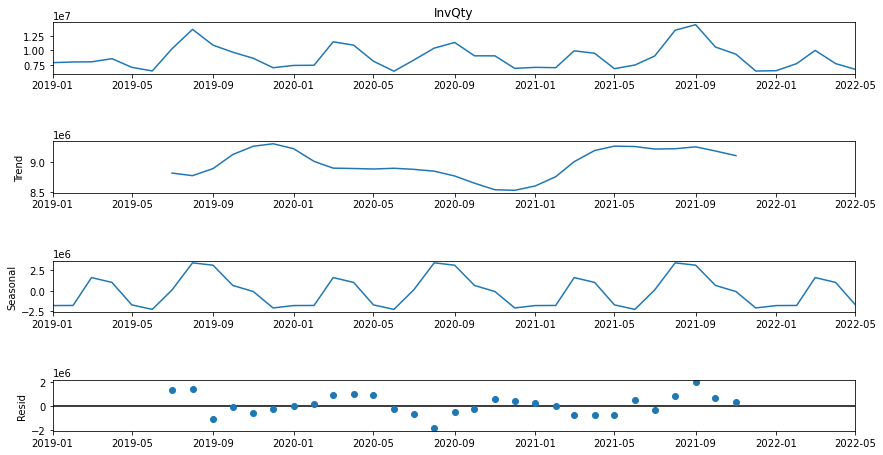

In [28]:
decomp = seasonal_decompose(indexedDataset['InvQty'])
fig = decomp.plot()
fig.set_size_inches(14,7)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

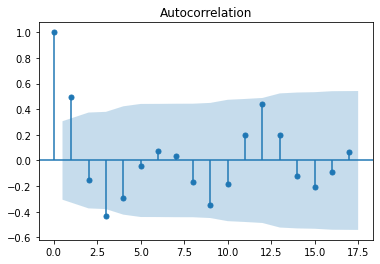

In [30]:
first_diff = plot_acf(indexedDataset['InvQty'].dropna())

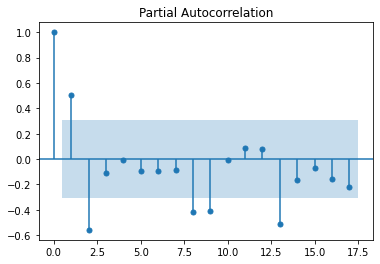

In [31]:
sec_diff = plot_pacf(indexedDataset['InvQty'].dropna())

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
fuller_test = adfuller(indexedDataset['InvQty'])
fuller_test

(-4.8262741234229525,
 4.842929359515017e-05,
 8,
 32,
 {'1%': -3.653519805908203,
  '5%': -2.9572185644531253,
  '10%': -2.6175881640625},
 940.6208522826962)

In [34]:
def test_p_value(data):
        fuller_test = adfuller(data)
        print('P-value: ',fuller_test[1])
        if fuller_test[1] <= 0.05:
            print('Reject null hypothesis, data is stationary')
        else:
            print('Do not reject null hypothesis, data is not stationary')

In [35]:
test_p_value(indexedDataset['InvQty'])

P-value:  4.842929359515017e-05
Reject null hypothesis, data is stationary


In [36]:
#The data is staionary

In [37]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [38]:
import itertools

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(indexedDataset['InvQty'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:79190921001.14752
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:973740094.2343407
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1596710393.9312892
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:502.23597979840224
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:911.757133129388


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\User

ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:906.5670934065632
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:528.6755178065832
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:499.8867043782029
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1336.8129562716265


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2036.8106511595138
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:841.8883342213467
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:467.79550711102104
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:987.5965216485565
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:921.8062567542069


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:525.5596611578051
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:466.5366483208019
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1436.257026443026
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:41051999.10497341
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:954.5243785235617
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:468.7880479582588


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:878.9218745654795
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:40895779.36572419
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:497.58024119532973
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:470.5951713057136
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1215.2758332340084


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:41051377.224074826
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:812.7222849575862
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:439.7438124986221
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:886.414795916584
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:40895189.787314065
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:499.88807374033615


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:440.2722152397312
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1278.2488694707858
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:40469331.43710001
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:873.2413640739827
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:497.52883022927796
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:882.3835054224745
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:884.1028599238848


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:496.99969324151493
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:498.51520371089714
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1247.174724368145
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:40368411.400400676
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:844.0842603813425
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:468.6453701729994


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:884.1506658551149
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:854.2119904181792
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:496.88243677417023


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:467.45167328253297
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1246.986449760295
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:39853393.17186891
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:850.4160743012832
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:470.9307215426327
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:854.4290510113062


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:39370556.201061696
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:470.7174012027979
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:472.5706884678765


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1207.5297563568488
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:39853296.26689482
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:814.385061186675
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:439.95106610525545
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:854.5502893007538
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:39370473.986178815


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:470.6906546195157
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:441.33550401460866


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [41]:
model = sm.tsa.statespace.SARIMAX(indexedDataset['InvQty'],order=(1,1,1),seasonal_order=(0,1,1,12))

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [42]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             InvQty   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -436.309
Date:                            Fri, 15 Jul 2022   AIC                            880.619
Time:                                    14:47:57   BIC                            885.948
Sample:                                01-01-2019   HQIC                           882.248
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4731      0.502      0.943      0.346      -0.511       1.457
ma.L1         -0.6589      0.391     -1.684      0.092      -1.426       0.108
ma.S.L12      -0.2076      0.155     -1.344      0.179      -0.510       0.095
sigma2      1.969e+12   1.66e-13   1.19e+25      0.000    1.97e+12    1.97e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 4.38
Prob(Q):                              0.62   Prob(JB):                         0.11
Heteroskedasticity (H):               0.43   Skew:                             0.96
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.9e+41. Standard errors may be unstable.
"""

In [43]:
results.resid

InvDate
2019-01-01    7.883079e+06
2019-02-01    1.356086e+06
2019-03-01    8.469880e+05
2019-04-01    1.085037e+06
2019-05-01   -1.028542e+06
2019-06-01   -6.013445e+05
2019-07-01    3.710632e+06
2019-08-01    3.937295e+06
2019-09-01   -1.703599e+06
2019-10-01   -1.103156e+06
2019-11-01   -1.304513e+06
2019-12-01   -2.220132e+06
2020-01-01   -6.451688e+06
2020-02-01   -1.508740e+06
2020-03-01    3.037431e+06
2020-04-01   -9.000698e+05
2020-05-01   -1.677636e+06
2020-06-01   -1.580202e+06
2020-07-01   -1.621949e+06
2020-08-01   -1.126946e+06
2020-09-01    2.677990e+06
2020-10-01   -1.051112e+06
2020-11-01    7.409933e+05
2020-12-01   -7.937274e+05
2021-01-01   -1.539746e+06
2021-02-01   -4.320271e+05
2021-03-01   -5.335584e+05
2021-04-01   -2.700128e+05
2021-05-01   -3.632330e+05
2021-06-01    1.951304e+06
2021-07-01   -3.007703e+05
2021-08-01    2.326022e+06
2021-09-01    1.098870e+06
2021-10-01   -1.393088e+06
2021-11-01   -1.106354e+06
2021-12-01   -1.159431e+06
2022-01-01   -7.3949

<AxesSubplot:xlabel='InvDate'>

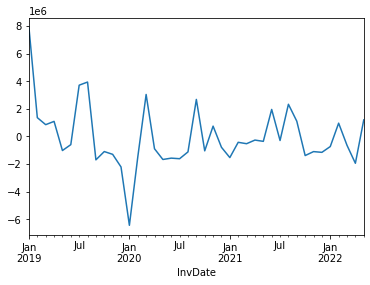

In [44]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

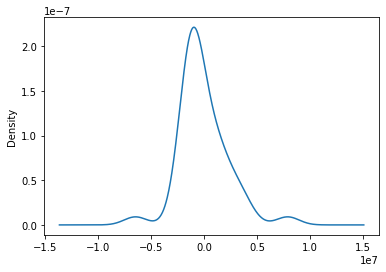

In [45]:
results.resid.plot(kind='kde')

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [47]:
sns.lineplot(indexedDataset[['InvQty','prediction']])
plt.show()

KeyError: "['prediction'] not in index"

In [48]:
indexedDataset['prediction'].plot(figsize=(12,8))

KeyError: 'prediction'

In [51]:
import plotly.express as px
fig = px.line(indexedDataset, x=indexedDataset.index, y=indexedDataset.columns,color_discrete_sequence=["green", "blue"]
              ,title='Fuel invoice vs prediction')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
ticklabelmode="period")
fig.show()

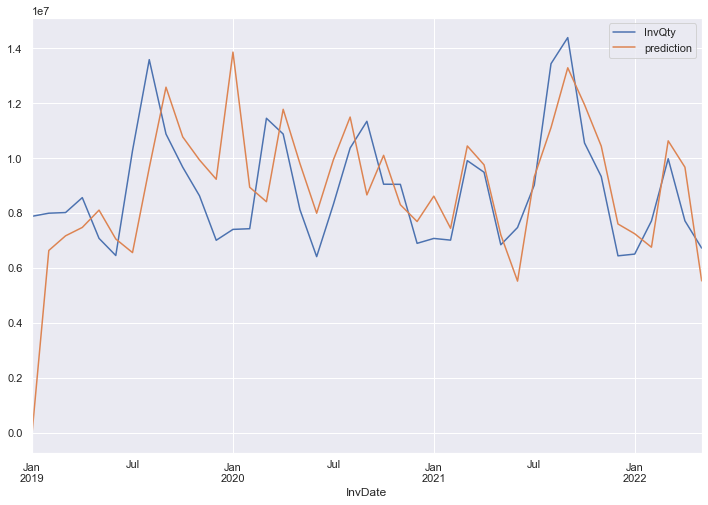

In [49]:
indexedDataset['prediction'] = results.predict()
indexedDataset[['InvQty','prediction']].plot(figsize=(12,8))
plt.style.use('dark_background')

In [52]:
from pandas.tseries.offsets import DateOffset
extra_dates = [indexedDataset.index[-1] + DateOffset(months=m) for m in range (1,13)]

In [53]:
extra_dates

[Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00')]

In [54]:
forecast_df = pd.DataFrame(index=extra_dates,columns=indexedDataset.columns)
forecast_df.head()

,InvQty,prediction
2022-06-01,NaN,NaN
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN


In [55]:
final_df = pd.concat([indexedDataset,forecast_df])

In [56]:
final_df.tail()

,InvQty,prediction
2023-01-01,NaN,NaN
2023-02-01,NaN,NaN
2023-03-01,NaN,NaN
2023-04-01,NaN,NaN
2023-05-01,NaN,NaN


In [59]:
final_df["InvQty"] = pd.to_numeric(final_df["InvQty"], downcast="float")
print(final_df.dtypes)

InvQty        float32
prediction    float64
dtype: object


In [60]:
import plotly.express as px
fig = px.line(final_df, x=final_df.index, y=final_df.columns,color_discrete_sequence=["green", "blue"],
              title='fuel invoice vs prediction')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",)
fig.show()

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



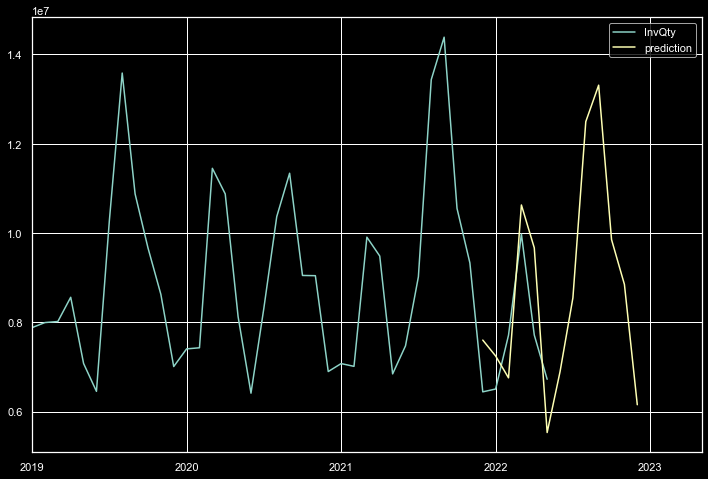

In [57]:
final_df['prediction'] = results.predict(start='2021-12-01', end='2022-12-01')
final_df[['InvQty','prediction']].plot(figsize=(12,8))
plt.style.use('dark_background')

***In the above we can see that the invoice quantity at the start of january i dipping becasue we havenot feed the data that is generated in the month (jan to mar)***

In [50]:
final_df['prediction'] = results.predict(start='2021-12-01', end='2022-12-01')

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [123]:
final_df['prediction'].head(12)

2019-01-01   NaN
2019-02-01   NaN
2019-03-01   NaN
2019-04-01   NaN
2019-05-01   NaN
2019-06-01   NaN
2019-07-01   NaN
2019-08-01   NaN
2019-09-01   NaN
2019-10-01   NaN
2019-11-01   NaN
2019-12-01   NaN
Name: prediction, dtype: float64

In [124]:
final_df.to_csv('predi.csv')

***The below are the predicted values***


In [126]:
expected=indexedDataset['InvQty']
predictions=indexedDataset['prediction']

In [127]:
forecasterros=[expected[i]-predictions[i] for i in range(len(expected))]
print('forecasterros: %s' % forecasterros)

forecasterros: [7883079.0, 113083.0, 23495.0, 543039.0, -1482843.0, -623753.0000000009, 3816728.0, 3310789.0, -2705691.0, -1208826.0, -1039312.0, -1618361.0, -5828248.81173438, -64300.33928392455, 4000015.2562323622, -1001973.3765411563, -1578501.7148484383, -1220411.8399108043, -1110097.9907542132, -564247.1819414832, 3108738.7007195055, -1334923.6199762076, 815553.1082201153, -868934.4765891153, -1500877.4038840923, -101223.53222272359, -244362.42880674824, -70511.76191264018, -237176.49030489475, 2072519.0728148501, -602829.2144923024, 2242462.651346218, 661979.8857183121, -1838439.3897049613, -1036660.2095426973, -931748.0147596356, -445893.46801072266, 1245933.7057573907, -682843.9018673543, -1854062.3070104849, 1595695.479210698]


In [128]:
expected=indexedDataset['InvQty']
predictions=indexedDataset['prediction']
forecasterros=[expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecasterros) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -8876.649124


In [129]:
from statistics import mean


In [130]:
mean_absolute_error = mean(forecasterros)


In [131]:
from sklearn.metrics import mean_absolute_error
expected=indexedDataset['InvQty']
predictions=indexedDataset['prediction']
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 1542199.130100
